In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../src")

In [19]:
import mesh
from tqdm.autonotebook import tqdm
import gzip
import json
from CwnGraph import CwnBase

<ipython-input-19-c6566843544b>:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
cwn = CwnBase()

In [ ]:
deeplex_path = mesh.get_data_dir() / "deeplex/deeplexicon_export_181209005320.json.gz"

In [6]:
with gzip.open(deeplex_path, "rt", encoding="UTF-8") as fin:
    deeplex = json.load(fin)

In [7]:
import pandas as pd

In [8]:
cld = pd.read_csv(mesh.get_data_dir()/"CLD/chineselexicaldatabase2.1.txt")

c:\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (3,4,8,9,12,13,17,18,22,23,28,29,111,112,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
from itertools import chain

In [10]:
deeplex[50]

{'lu': '矮',
 'data': {'tag_CK': 'VH13',
  'count_CK': '101',
  'tag_j': 'a',
  'count_j': '1310',
  'total_count_CK': 101,
  'total_count_j': 1310,
  'modified_count': '221',
  'modified_tag': 'a',
  'Dyear': 2009,
  'Byear': 1900,
  'age': 3,
  'LeeAmbigRating': 1.2308,
  'LeeNamingAcc': 0.8,
  'LeeNamingRT': 702}}

In [31]:
def find_cwn_senses(lemma):
    try:
        sense_iter = (x.senses for x in cwn.find_lemma(f"^{lemma}$"))
        sense_iter = chain.from_iterable(sense_iter)
        return list(sense_iter)
    except Exception as ex:
        print(lemma)
        print(ex)
        return []

In [32]:
fields = "LeeNamingAcc,LeeNamingRT".split(",")
data = []

for entry in tqdm(deeplex):
    lu = entry['lu']
    try:
        if len(lu) != 1:
            continue
    except TypeError as ex:
        print(ex)
        print(entry)
        continue
    lu_data = entry["data"]    
    sdata = {"lu": lu, 
             "freq": lu_data.get("total_count_CK", 0),
             "n_sense": len(find_cwn_senses(lu))}
    if all(x not in lu_data for x in fields):
        continue
    for fd in fields:
        sdata[fd] = lu_data.get(fd, None)
    data.append(sdata)

object of type 'float' has no len()
{'lu': nan, 'data': {'neo_stage': nan, 'loan_word': nan, 'polarity': 'P'}}
?
nothing to repeat at position 1



In [33]:
sc_data = pd.DataFrame.from_records(data).sort_values("freq", ascending=False).reset_index(drop=True)

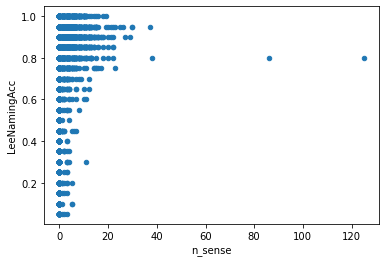

In [70]:
from matplotlib import pyplot as plt
ax = sc_data.plot.scatter("n_sense", "LeeNamingAcc")

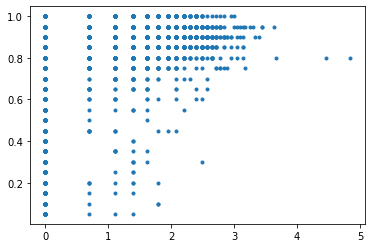

In [75]:
plt.plot(np.log(sc_data.n_sense+1), sc_data.LeeNamingAcc, '.')

In [74]:
import numpy as np

In [79]:
sc_data.to_csv(mesh.get_data_dir() / "single-charac-nsense.csv", index=False)

In [37]:
cld = cld.set_index("Word")

In [54]:
cld.loc[cld.Length==1, :]

,C1,C2,C3,C4,Length,C1Structure,C2Structure,C3Structure,C4Structure,C1Type,...,PSPMI,TScore,PSTScore,C1ConditionalProbability,C12ConditionalProbability,C123ConditionalProbability,C1BackwardConditionalProbability,C12BackwardConditionalProbability,C123BackwardConditionalProbability,EntropyCharacterFrequencies
Word,,,,,,,,,,,,,,,,,,,,,
曲,曲,NaN,NaN,NaN,1,SG,NaN,NaN,NaN,Picto,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
案,案,NaN,NaN,NaN,1,UD,NaN,NaN,NaN,PicPho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
投,投,NaN,NaN,NaN,1,LR,NaN,NaN,NaN,PicPho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
稳,稳,NaN,NaN,NaN,1,LR,NaN,NaN,NaN,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
敝,敝,NaN,NaN,NaN,1,LR,NaN,NaN,NaN,PicSyn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
哬,哬,NaN,NaN,NaN,1,LR,NaN,NaN,NaN,PicPho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
钌,钌,NaN,NaN,NaN,1,LR,NaN,NaN,NaN,PicPho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
薮,薮,NaN,NaN,NaN,1,UD,NaN,NaN,NaN,PicPho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cwn Synset

In [86]:
synsets = [(nid, node) for nid, node in cwn.V.items() if node["node_type"] == "synset"]

In [121]:
from CwnGraph import CwnSynset
syn_data = []
def get_lemma(sense):
    lemmas = sense.lemmas
    if lemmas:
        return lemmas[0].lemma
    else:
        return ""
    
for syn_id, _ in tqdm(synsets):
    syn_x = CwnSynset(syn_id, cwn)
    if len(syn_x.senses) < 2:
        continue
    syn_entry = dict(
        syn_id = syn_id,
        syn_def = syn_x.definition, 
        syn_lemmas = ";".join(get_lemma(x) for x in syn_x.senses)
    )
    syn_data.append(syn_entry)
    

In [123]:
syn_frame = pd.DataFrame.from_records(syn_data).set_index("syn_id")

In [124]:
syn_frame.to_csv(mesh.get_data_dir() / "cwn-synsets-lemmas.csv")